MNIST DeepModel (Introduction to Deep Learning)

In [1]:
#Imports and Mounting the Drive

import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Assignment1')
from datasets import MNISTDataset

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Loading the Data

---

Code referenced from [MNIST Linear Model tutorial](http://blog.ai.ovgu.de/posts/jens/2019/002_tf20_basic_mnist/index.html) by AI lab, OVGU

4423680/4422102 [==============================] - 0s 0us/step
tf.Tensor([60000    28    28], shape=(3,), dtype=int32)


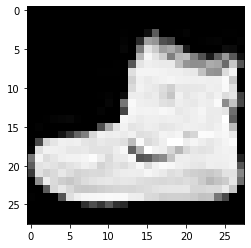

In [2]:
#Load Data

mnist = tf.keras.datasets.fashion_mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = mnist.load_data()
plt.imshow(train_imgs[0], cmap = "Greys_r")
data = MNISTDataset(train_imgs.reshape([-1, 784]), train_lbls, 
                    test_imgs.reshape([-1, 784]), test_lbls, batch_size=128)
print(tf.shape(train_imgs))

Training with 1 hidden layer, random_uniform weights , ACTIVATION_FUNCTION=ReLu,hidden_layer_size=50

---



In [3]:
#1 HIDDEN LAYER, RANDOM_UNIFORM WEIGHTS , ACTIVATION_FUNCTION=ReLu, HIDDEN_LAYER_SIZE=50

mlpsh = []
lossh = []
#Training Setup
train_stps = 1000
learning_rate = 0.1
W = tf.Variable(tf.random.uniform( shape=[50, 10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b = tf.Variable(tf.random.uniform( shape=[10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
W_h = tf.Variable(tf.random.uniform( shape=[784,50], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b_h = tf.Variable(tf.random.uniform( shape=[50], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))

#Training

for step in range(train_stps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as t:
    z = tf.matmul(img_batch, W_h) + b_h
    a = tf.nn.relu(z)
    logits = tf.matmul(a, W) + b
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = lbl_batch))
    grads = t.gradient(xent, [W_h, b_h, W, b])
    W_h.assign_sub(learning_rate * grads[0])
    b_h.assign_sub(learning_rate * grads[1])
    W.assign_sub(learning_rate * grads[2])
    b.assign_sub(learning_rate * grads[3])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        mlpsh.append(acc.numpy())
        lossh.append(xent.numpy())
        print("Loss: %.4f Accuracy: %.4f" % (xent, acc))

Loss: 2.3628 Accuracy: 0.0547
Loss: 0.9043 Accuracy: 0.6797
Loss: 0.7355 Accuracy: 0.7656
Loss: 0.5702 Accuracy: 0.7812
Loss: 0.5013 Accuracy: 0.8438
Starting new epoch...
Loss: 0.4656 Accuracy: 0.8359
Loss: 0.5316 Accuracy: 0.7891
Loss: 0.5017 Accuracy: 0.8203
Loss: 0.5464 Accuracy: 0.7969
Loss: 0.4751 Accuracy: 0.8281
Starting new epoch...


In [4]:
#Testing
a = tf.matmul(data.test_data, W_h) + b_h
z = tf.nn.relu(a)
c = tf.matmul(z, W) + b
test_preds = tf.argmax(c, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 82.76 %


Training with 1 hidden layer, random_uniform weights , ACTIVATION_FUNCTION=ReLu,hidden_layer_size=500

---

In [5]:
#1 HIDDEN LAYER, RANDOM_UNIFORM WEIGHTS , ACTIVATION_FUNCTION=ReLu, HIDDEN_LAYER_SIZE=500

mlp1h = []
loss1h = []
#Training Setup
train_stps = 1000
learning_rate = 0.1
W = tf.Variable(tf.random.uniform( shape=[500, 10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b = tf.Variable(tf.random.uniform( shape=[10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
W_h = tf.Variable(tf.random.uniform( shape=[784,500], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b_h = tf.Variable(tf.random.uniform( shape=[500], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))

#Training

for step in range(train_stps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as t:
    z = tf.matmul(img_batch, W_h) + b_h
    a = tf.nn.relu(z)
    logits = tf.matmul(a, W) + b
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = lbl_batch))
    grads = t.gradient(xent, [W_h, b_h, W, b])
    W_h.assign_sub(learning_rate * grads[0])
    b_h.assign_sub(learning_rate * grads[1])
    W.assign_sub(learning_rate * grads[2])
    b.assign_sub(learning_rate * grads[3])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        mlp1h.append(acc.numpy())
        loss1h.append(xent.numpy())
        print("Loss: %.4f Accuracy: %.4f" % (xent, acc))

Loss: 2.4046 Accuracy: 0.0859
Loss: 0.5176 Accuracy: 0.8203
Loss: 0.5843 Accuracy: 0.7969
Loss: 0.4902 Accuracy: 0.8359
Loss: 0.6452 Accuracy: 0.7812
Starting new epoch...
Loss: 0.5112 Accuracy: 0.8281
Loss: 0.4902 Accuracy: 0.7969
Loss: 0.4870 Accuracy: 0.7969
Loss: 0.7022 Accuracy: 0.7188
Starting new epoch...
Loss: 0.4125 Accuracy: 0.8750


In [6]:
#Testing
a = tf.matmul(data.test_data, W_h) + b_h
z = tf.nn.relu(a)
c = tf.matmul(z, W) + b
test_preds = tf.argmax(c, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 84.70 %


Remark: Increasing the number of hidden layer units has increased the tesing accuracy 

Training with 1 hidden layer, random_normal weights , ACTIVATION_FUNCTION=ReLu,hidden_layer_size=50

---

In [7]:
#1 HIDDEN LAYER, RANDOM_NORMAL WEIGHTS , ACTIVATION_FUNCTION=ReLu, HIDDEN_LAYER_SIZE=50

#Training Setup

train_stps = 1000
learning_rate = 0.1
W = tf.Variable(tf.random.normal( shape=[50, 10], mean=0.0, stddev= 0.2, dtype=tf.dtypes.float32 ))
b = tf.Variable(tf.random.normal( shape=[10], mean=0.0, stddev= 0.2, dtype=tf.dtypes.float32 ))
W_h = tf.Variable(tf.random.normal( shape=[784,50], mean=0.0, stddev= 0.2, dtype=tf.dtypes.float32 ))
b_h = tf.Variable(tf.random.normal( shape=[50], mean=0.0, stddev= 0.2, dtype=tf.dtypes.float32 ))

#Training

for step in range(train_stps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as t:
    z = tf.matmul(img_batch, W_h) + b_h
    a = tf.nn.relu(z)
    logits = tf.matmul(a, W) + b
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = lbl_batch))
    grads = t.gradient(xent, [W_h, b_h, W, b])
    W_h.assign_sub(learning_rate * grads[0])
    b_h.assign_sub(learning_rate * grads[1])
    W.assign_sub(learning_rate * grads[2])
    b.assign_sub(learning_rate * grads[3])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: %.4f Accuracy: %.4f" % (xent, acc))

Loss: 3.7487 Accuracy: 0.1641
Loss: 0.8248 Accuracy: 0.6953
Loss: 0.6896 Accuracy: 0.7500
Loss: 0.8901 Accuracy: 0.7500
Starting new epoch...
Loss: 0.6009 Accuracy: 0.7578
Loss: 0.5000 Accuracy: 0.8047
Loss: 0.5895 Accuracy: 0.7969
Loss: 0.5068 Accuracy: 0.8203
Loss: 0.4825 Accuracy: 0.8281
Starting new epoch...
Loss: 0.5009 Accuracy: 0.8125


In [8]:
#Testing
a = tf.matmul(data.test_data, W_h) + b_h
z = tf.nn.relu(a)
c = tf.matmul(z, W) + b
test_preds = tf.argmax(c, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 82.32 %


Training with 1 hidden layer, random_normal weights , ACTIVATION_FUNCTION=ReLu,hidden_layer_size=500

---

In [9]:
#1 HIDDEN LAYER, RANDOM_NORMAL WEIGHTS , ACTIVATION_FUNCTION=ReLu, HIDDEN_LAYER_SIZE=500

mlpran = []
lossran = []
#Training Setup
train_stps = 1000
learning_rate = 0.1
W = tf.Variable(tf.random.normal( shape=[500, 10], mean=0.0, stddev= 0.2, dtype=tf.dtypes.float32 ))
b = tf.Variable(tf.random.normal( shape=[10], mean=0.0, stddev= 0.2, dtype=tf.dtypes.float32 ))
W_h = tf.Variable(tf.random.normal( shape=[784,500], mean=0.0, stddev= 0.2, dtype=tf.dtypes.float32 ))
b_h = tf.Variable(tf.random.normal( shape=[500], mean=0.0, stddev= 0.2, dtype=tf.dtypes.float32 ))

#Training

for step in range(train_stps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as t:
    z = tf.matmul(img_batch, W_h) + b_h
    a = tf.nn.relu(z)
    logits = tf.matmul(a, W) + b
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = lbl_batch))
    grads = t.gradient(xent, [W_h, b_h, W, b])
    W_h.assign_sub(learning_rate * grads[0])
    b_h.assign_sub(learning_rate * grads[1])
    W.assign_sub(learning_rate * grads[2])
    b.assign_sub(learning_rate * grads[3])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        mlpran.append(acc.numpy())
        lossran.append(xent.numpy())
        print("Loss: %.4f Accuracy: %.4f" % (xent, acc))

Loss: 14.0682 Accuracy: 0.1328
Loss: 0.5858 Accuracy: 0.8125
Loss: 0.7801 Accuracy: 0.7422
Starting new epoch...
Loss: 0.5012 Accuracy: 0.8594
Loss: 0.6320 Accuracy: 0.7578
Loss: 0.3609 Accuracy: 0.8594
Loss: 0.3373 Accuracy: 0.8984
Loss: 0.3766 Accuracy: 0.8594
Starting new epoch...
Loss: 0.4601 Accuracy: 0.8516
Loss: 0.3796 Accuracy: 0.8750


In [10]:
#Testing
a = tf.matmul(data.test_data, W_h) + b_h
z = tf.nn.relu(a)
c = tf.matmul(z, W) + b
test_preds = tf.argmax(c, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 84.47 %


Remark: Using random normal distribution for initializing weights instead of uniform distribution, we see a minute difference in the accuracy of the MLP.

Training with 1 hidden layer, random_uniform weights , ACTIVATION_FUNCTION=Sigmoid,hidden_layer_size=50

---

In [11]:
#1 HIDDEN LAYER, RANDOM_UNIFORM WEIGHTS , ACTIVATION_FUNCTION=Sigmoid, HIDDEN_LAYER_SIZE=50

#Training Setup

train_stps = 1000
learning_rate = 0.1
W = tf.Variable(tf.random.uniform( shape=[50, 10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b = tf.Variable(tf.random.uniform( shape=[10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
W_h = tf.Variable(tf.random.uniform( shape=[784,50], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b_h = tf.Variable(tf.random.uniform( shape=[50], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))

#Training

for step in range(train_stps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as t:
    z = tf.matmul(img_batch, W_h) + b_h
    a = tf.nn.sigmoid(z)
    logits = tf.matmul(a, W) + b
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = lbl_batch))
    grads = t.gradient(xent, [W_h, b_h, W, b])
    W_h.assign_sub(learning_rate * grads[0])
    b_h.assign_sub(learning_rate * grads[1])
    W.assign_sub(learning_rate * grads[2])
    b.assign_sub(learning_rate * grads[3])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: %.4f Accuracy: %.4f" % (xent, acc))

Loss: 2.3047 Accuracy: 0.1250
Loss: 1.6870 Accuracy: 0.5312
Loss: 1.1935 Accuracy: 0.6797
Starting new epoch...
Loss: 1.0113 Accuracy: 0.6875
Loss: 0.8765 Accuracy: 0.7188
Loss: 0.8887 Accuracy: 0.6719
Loss: 0.7936 Accuracy: 0.6953
Starting new epoch...
Loss: 0.7653 Accuracy: 0.7031
Loss: 0.6519 Accuracy: 0.7734
Loss: 0.7497 Accuracy: 0.7500


In [12]:
#Testing
a = tf.matmul(data.test_data, W_h) + b_h
z = tf.nn.sigmoid(a)
c = tf.matmul(z, W) + b
test_preds = tf.argmax(c, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 76.84 %


Training with 1 hidden layer, random_uniform weights , ACTIVATION_FUNCTION=Sigmoid,hidden_layer_size=500

---

In [13]:
#1 HIDDEN LAYER, RANDOM_UNIFORM WEIGHTS , ACTIVATION_FUNCTION=Sigmoid, HIDDEN_LAYER_SIZE=500

mlpsig = []
lossig = []
#Training Setup
train_stps = 1000
learning_rate = 0.1
W = tf.Variable(tf.random.uniform( shape=[500, 10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b = tf.Variable(tf.random.uniform( shape=[10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
W_h = tf.Variable(tf.random.uniform( shape=[784,500], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b_h = tf.Variable(tf.random.uniform( shape=[500], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))

#Training

for step in range(train_stps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as t:
    z = tf.matmul(img_batch, W_h) + b_h
    a = tf.nn.sigmoid(z)
    logits = tf.matmul(a, W) + b
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = lbl_batch))
    grads = t.gradient(xent, [W_h, b_h, W, b])
    W_h.assign_sub(learning_rate * grads[0])
    b_h.assign_sub(learning_rate * grads[1])
    W.assign_sub(learning_rate * grads[2])
    b.assign_sub(learning_rate * grads[3])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        mlpsig.append(acc.numpy())
        lossig.append(xent.numpy())
        print("Loss: %.4f Accuracy: %.4f" % (xent, acc))

Loss: 2.4718 Accuracy: 0.1719
Loss: 0.9373 Accuracy: 0.6953
Starting new epoch...
Loss: 0.6793 Accuracy: 0.7969
Loss: 0.5493 Accuracy: 0.8594
Loss: 0.6910 Accuracy: 0.7656
Loss: 0.6528 Accuracy: 0.7734
Loss: 0.6133 Accuracy: 0.7891
Starting new epoch...
Loss: 0.6073 Accuracy: 0.7891
Loss: 0.7222 Accuracy: 0.7891
Loss: 0.4498 Accuracy: 0.8125


In [14]:
#Testing
a = tf.matmul(data.test_data, W_h) + b_h
z = tf.nn.sigmoid(a)
c = tf.matmul(z, W) + b
test_preds = tf.argmax(c, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 80.32 %


Remark: Using sigmoid function as the activation function in place of ReLu, the accuracy decreases by approximately 4%

Training with 1 hidden layer, random_uniform weights , ACTIVATION_FUNCTION=tanh,hidden_layer_size=500

---

In [15]:
#1 HIDDEN LAYER, RANDOM_UNIFORM WEIGHTS , ACTIVATION_FUNCTION=tanh, HIDDEN_LAYER_SIZE=500

mlptan = []
losstan = []
#Training Setup
train_stps = 1000
learning_rate = 0.1
W = tf.Variable(tf.random.uniform( shape=[500, 10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b = tf.Variable(tf.random.uniform( shape=[10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
W_h = tf.Variable(tf.random.uniform( shape=[784,500], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))
b_h = tf.Variable(tf.random.uniform( shape=[500], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32 ))

#Training

for step in range(train_stps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as t:
    z = tf.matmul(img_batch, W_h) + b_h
    a = tf.nn.tanh(z)
    logits = tf.matmul(a, W) + b
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = lbl_batch))
    grads = t.gradient(xent, [W_h, b_h, W, b])
    W_h.assign_sub(learning_rate * grads[0])
    b_h.assign_sub(learning_rate * grads[1])
    W.assign_sub(learning_rate * grads[2])
    b.assign_sub(learning_rate * grads[3])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        mlptan.append(acc.numpy())
        losstan.append(xent.numpy())
        print("Loss: %.4f Accuracy: %.4f" % (xent, acc))

Loss: 2.5908 Accuracy: 0.0703
Starting new epoch...
Loss: 0.6780 Accuracy: 0.7656
Loss: 0.4588 Accuracy: 0.8594
Loss: 0.4485 Accuracy: 0.8203
Loss: 0.5036 Accuracy: 0.7969
Loss: 0.4184 Accuracy: 0.8594
Starting new epoch...
Loss: 0.4903 Accuracy: 0.8203
Loss: 0.5361 Accuracy: 0.7891
Loss: 0.7111 Accuracy: 0.7500
Loss: 0.5078 Accuracy: 0.8047


In [16]:
#Testing
a = tf.matmul(data.test_data, W_h) + b_h
z = tf.nn.tanh(a)
c = tf.matmul(z, W) + b
test_preds = tf.argmax(c, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 83.57 %


Remark: Using hyperbolic tan function as the activation function in place of ReLu, the accuracy decreases by approximately 2%

Training with 2 hidden layers, random_uniform weights , ACTIVATION_FUNCTION=ReLu,hidden_layer1_size=500,hidden_layer2_size=50

---

In [17]:
#2 HIDDEN LAYERS, RANDOM_UNIFORM WEIGHTS , ACTIVATION_FUNCTION=ReLu, HIDDEN_LAYER1_SIZE=500, HIDDEN_LAYER1_SIZE=50

mlp2h = []
loss2h = []
train_stps = 1000
learning_rate = 0.1
w1 = tf.Variable(tf.random.uniform(shape=[784,500],minval=-0.1,maxval=0.1,dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.random.uniform(shape=[500],minval=-0.1,maxval=0.1,dtype=tf.dtypes.float32))
w2=  tf.Variable(tf.random.uniform(shape=[500,50],minval=-0.1,maxval=0.1,dtype=tf.dtypes.float32))
b2= tf.Variable(tf.random.uniform(shape=[50],minval=-0.1,maxval=0.1,dtype=tf.dtypes.float32))
w3=  tf.Variable(tf.random.uniform(shape=[50,10],minval=-0.1,maxval=0.1,dtype=tf.dtypes.float32))
b3= tf.Variable(tf.random.uniform(shape=[10],minval=-0.1,maxval=0.1,dtype=tf.dtypes.float32))

#Training with 2 hidden layer
for step in range(train_stps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        
        h1 = tf.nn.relu(tf.matmul(img_batch, w1) + b1)
        h2 = tf.nn.relu(tf.matmul(h1, w2) + b2 )
        logits= tf.matmul(h2,w3) + b3
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [w1,b1,w2,b2,w3,b3])
    w1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])
    w2.assign_sub(learning_rate * grads[2])
    b2.assign_sub(learning_rate * grads[3])
    w3.assign_sub(learning_rate * grads[4])
    b3.assign_sub(learning_rate * grads[5])   
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        mlp2h.append(acc.numpy())
        loss2h.append(xent.numpy())
        print("Loss: %.4f Accuracy: %.4f" % (xent, acc))

Loss: 2.3221 Accuracy: 0.0938
Starting new epoch...
Loss: 0.6123 Accuracy: 0.7812
Loss: 0.5843 Accuracy: 0.8438
Loss: 0.6154 Accuracy: 0.7500
Loss: 0.4990 Accuracy: 0.8047
Loss: 0.5192 Accuracy: 0.8203
Starting new epoch...
Loss: 0.3768 Accuracy: 0.8906
Loss: 0.4051 Accuracy: 0.8125
Loss: 0.4276 Accuracy: 0.8750
Loss: 0.4164 Accuracy: 0.8203
Starting new epoch...


In [18]:
#Testing

hidden1= tf.nn.relu(tf.matmul(data.test_data, w1) + b1)
hidden2=tf.nn.relu(tf.matmul(hidden1, w2) + b2)
logits_test=tf.matmul(hidden2, w3) + b3
test_preds = tf.argmax(logits_test, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 83.71 %


Remark: Adding another hidden layer of 50 units to the MLP with single hidden layer of 500 units, increases accuracy marginally. As the size of the second hidden layer is increased, better testing accuracy can be achieved.

---




1.  **Initialize the weights to non-zero value:-** This is because initilizing variables to zero, inputs zeros to the hidden layer and to the ouput layer making the loss too large. The gradient of the loss function with respect to the parameters is very small and the more we multiply during back-propagation the samller are the gradients. Thus, we are stuck in the local neighbourhood

2.   **Which of these parts do you think should be wrapped in higher-level interfaces? Do you feel like you are forced to provide any redundant information when defining your model? -**
Addition of each hidden layer needs to be provided with proper dimensions for each parameter i.e. weights and biases. Linear regression also has to be done for each layer. A simple function can be made to add a layer of specifies units and return a tensor after activation function is applied.




# **Plotting Model performance**

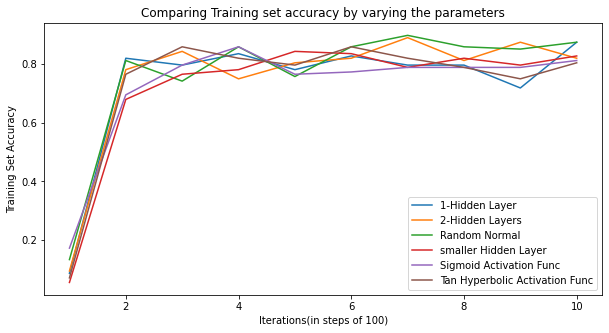

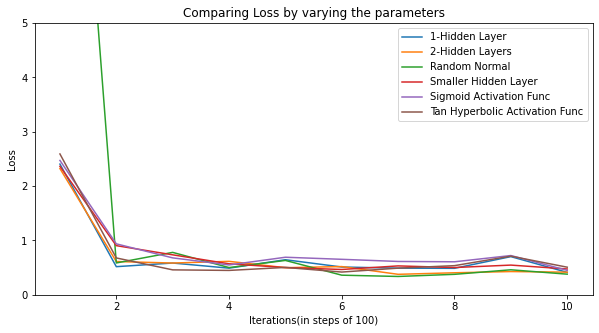

In [19]:
y1=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,5))
plt.plot(y1,mlp1h, label = "1-Hidden Layer")
plt.plot(y1,mlp2h, label = "2-Hidden Layers")
plt.plot(y1,mlpran, label = "Random Normal")
plt.plot(y1,mlpsh, label = "smaller Hidden Layer")
plt.plot(y1,mlpsig, label = "Sigmoid Activation Func")
plt.plot(y1,mlptan, label = "Tan Hyperbolic Activation Func")
plt.xlabel("Iterations(in steps of 100)")
plt.ylabel("Training Set Accuracy")
plt.title("Comparing Training set accuracy by varying the parameters")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.ylim(0,5)
plt.plot(y1,loss1h, label = "1-Hidden Layer")
plt.plot(y1,loss2h, label = "2-Hidden Layers")
plt.plot(y1,lossran, label = "Random Normal")
plt.plot(y1,lossh, label = "Smaller Hidden Layer")
plt.plot(y1,lossig, label = "Sigmoid Activation Func")
plt.plot(y1,losstan, label = "Tan Hyperbolic Activation Func")
plt.xlabel("Iterations(in steps of 100)")
plt.ylabel("Loss")
plt.title("Comparing Loss by varying the parameters")
plt.legend()
plt.show()